# BELLA BEAT APP EDA

In [28]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from datetime import datetime, date, time, timedelta, timezone
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from pandasql import sqldf
import pandas as pd

In [2]:
#importing the file using read_csv
df = pd.read_csv("C:/Users/ogabi/Documents/Data Analysis/Data Analysis with Coursera/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,04/12/2016,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [3]:
#viewing a random sample of the table
df.sample(100)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
665,6775888955,4/23/2016,0,0.00,0.00,0.00,0.00,0.00,0,0,0,1440,1841
730,7007744171,05/01/2016,5600,3.75,3.75,0.00,0.00,3.75,0,0,237,1142,2225
333,3977333714,4/29/2016,10645,7.75,7.75,3.74,1.30,2.71,36,32,150,744,1545
717,7007744171,4/18/2016,14816,10.98,9.91,3.79,2.12,5.05,48,31,284,1077,2832
425,4388161847,4/25/2016,12961,9.97,9.97,0.73,1.40,7.84,11,31,301,1054,3288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1844505072,4/26/2016,0,0.00,0.00,0.00,0.00,0.00,0,0,0,1440,1347
315,3372868164,05/01/2016,3077,2.10,2.10,0.00,0.00,2.09,0,0,172,842,1237
692,6962181067,4/24/2016,5029,3.32,3.32,0.00,0.00,3.32,0,0,199,720,1705
73,1644430081,4/23/2016,6637,4.83,4.83,0.00,0.58,4.25,0,15,160,1265,2677


In [4]:
#getting all column names
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories'],
      dtype='object')

## Data description and cleaning 

In [5]:
#getting information on the datatypes present in the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   VeryActiveDistance        940 non-null    float64
 6   ModeratelyActiveDistance  940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   VeryActiveMinutes         940 non-null    int64  
 9   FairlyActiveMinutes       940 non-null    int64  
 10  LightlyActiveMinutes      940 non-null    int64  
 11  SedentaryMinutes          940 non-null    int64  
 12  Calories                  940 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 95.6+ KB


In [6]:
#statistical description of the data
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,1.502681,0.567543,3.340819,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,2.658941,0.883580,2.040655,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.210000,0.240000,3.365000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,2.052500,0.800000,4.782500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [7]:
#checking the number of rows and columns
df.shape

(940, 13)

In [8]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
#dropping duplicated colunms and unnecessary columns
df1 = df.drop(labels = ['TrackerDistance', 'Id'], axis = 1)

<AxesSubplot:title={'center':'Total Steps Boxplot'}>

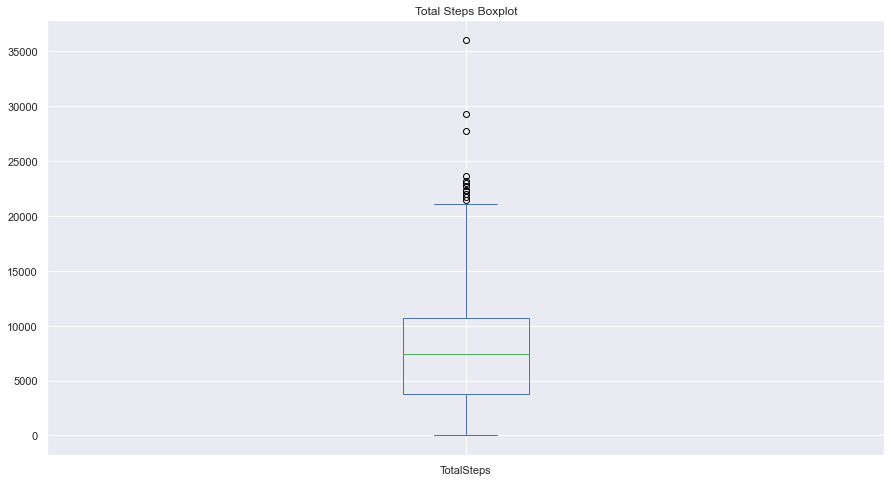

In [12]:
#checking for outliers
df1['TotalSteps'].plot(kind = 'box', title = 'Total Steps Boxplot')

<AxesSubplot:title={'center':'Total Steps Spread'}, ylabel='Frequency'>

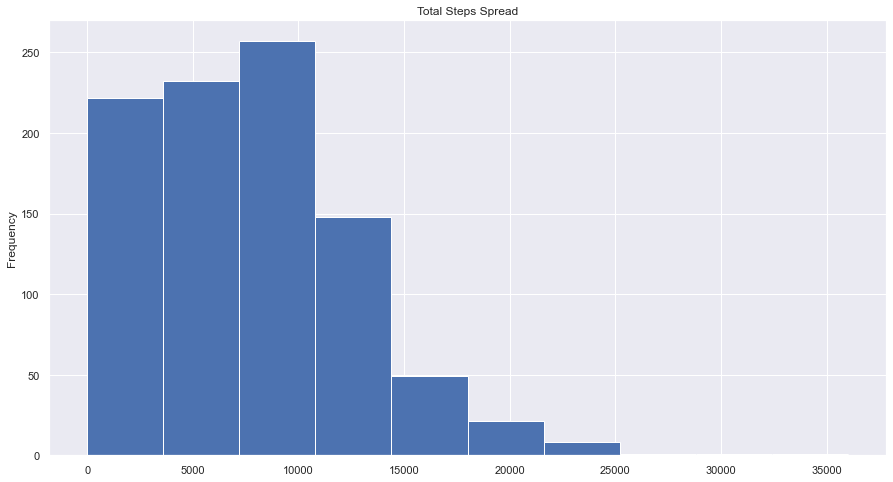

In [13]:
#checking the data spread
df1['TotalSteps'].plot(kind = "hist", title = "Total Steps Spread")

<AxesSubplot:title={'center':'Total Distance Boxplot'}>

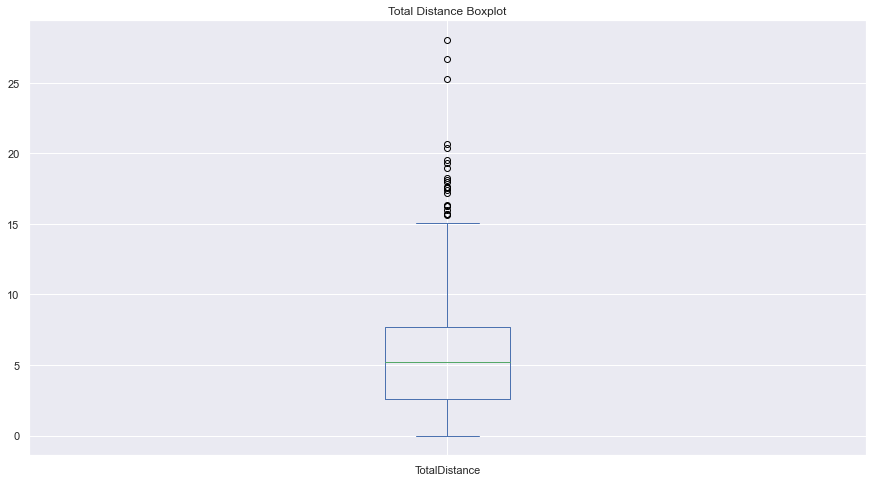

In [14]:
#checking for outliers in the total distance column
df1['TotalDistance'].plot(kind = 'box', title = 'Total Distance Boxplot')

In [15]:
#dealing with outliers
#checking minimum and maximum values specific columns
df1['TotalSteps'].max()

36019

In [16]:
df1['TotalSteps'].min()

0

In [17]:
df1['TotalDistance'].max()

28.03000069

In [18]:
df1['TotalDistance'].min()

0.0

In [29]:
#Using sql for further cleaning, removing zero values
q = "SELECT * FROM df1 LIMIT 3"
sqldf(q, globals())

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,month
0,2016-04-12 00:00:00.000000,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,April
1,2016-04-13 00:00:00.000000,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,April
2,2016-04-14 00:00:00.000000,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776,April


In [30]:
#creating a function for faster analysis
pysqldf = lambda q: sqldf(q, globals())

In [32]:
#testing the function
query = 'SELECT * FROM df1 LIMIT 3'
pysqldf(query)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,month
0,2016-04-12 00:00:00.000000,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,April
1,2016-04-13 00:00:00.000000,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,April
2,2016-04-14 00:00:00.000000,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776,April


In [34]:
#checking how many null values are present in TotalDistance
query = 'SELECT COUNT(*) AS sum FROM df1 WHERE TotalDistance = 0.00'
pysqldf(query)

,sum
0,78


In [36]:
##checking how many null values are present in TotalSteps
query = 'SELECT COUNT(*) AS sum FROM df1 WHERE TotalSteps = 0.0'
pysqldf(query)

,sum
0,77


In [47]:
#deleting rows from the table where TotalDistance and TotalSteps equals zero
query = 'DELETE FROM df1 WHERE TotalDistance = 0.00'
pysqldf(query)
#the table remained the same as before

In [57]:
#trying again in pandas
df2 = df1[ (df1['TotalDistance'] != 0.0) & (df1['TotalSteps'] != 0)]
#worked!

In [58]:
#statistical description of the new table
df2.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,8329.039443,5.986450,1.638654,0.618898,3.643121,23.041763,14.792343,210.258701,955.192575,2362.470998
std,4739.246947,3.717616,2.736308,0.905329,1.854434,33.656502,20.433053,96.574833,279.971556,702.269583
min,8.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
25%,4926.750000,3.372500,0.000000,0.000000,2.350000,0.000000,0.000000,147.000000,721.250000,1856.750000
50%,8053.500000,5.590000,0.410000,0.310000,3.580000,7.000000,8.000000,208.500000,1020.500000,2220.500000
75%,11096.250000,7.905000,2.277500,0.867500,4.897500,35.000000,21.000000,272.000000,1189.000000,2832.000000
max,36019.000000,28.030001,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [62]:
#viewing few rows from the table
df2.head()

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,month
0,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,April
1,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,April
2,2016-04-14,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776,April
3,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,April
4,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,April


In [61]:
#getting sum of outliers in sql
query = 'SELECT COUNT(*) AS sumoutliers FROM df2 WHERE TotalSteps > 20000'
pysqldf(query)

,sumoutliers
0,19


In [68]:
#replacing outliers in TotalSteps and Total distance with the median
median = float(df2['TotalSteps'].median())
df2["TotalSteps"] = np.where(df2["TotalSteps"] >20000, median,df2['TotalSteps'])

C:\Users\ogabi\AppData\Local\Temp\ipykernel_11044\458790029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalSteps"] = np.where(df2["TotalSteps"] >20000, median,df2['TotalSteps'])


<AxesSubplot:title={'center':'Total Steps Boxplot'}>

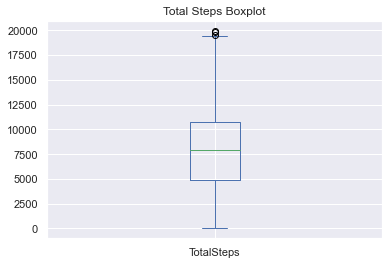

In [69]:
#boxplot after removing outliers
df2['TotalSteps'].plot(kind = 'box', title = 'Total Steps Boxplot')

In [72]:
median = float(df2['TotalDistance'].median())
df2["TotalDistance"] = np.where(df2["TotalDistance"] >15, median,df2['TotalDistance'])

C:\Users\ogabi\AppData\Local\Temp\ipykernel_11044\1591664049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalDistance"] = np.where(df2["TotalDistance"] >15, median,df2['TotalDistance'])


<AxesSubplot:title={'center':'Total Distance Boxplot'}>

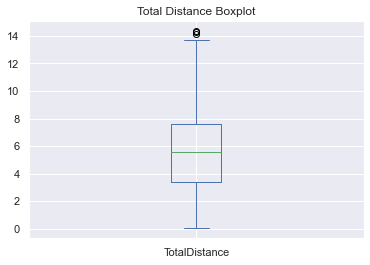

In [73]:
#boxplot after removing outliers
df2['TotalDistance'].plot(kind = 'box', title = 'Total Distance Boxplot')

In [21]:
#checking for unique values in activity date 
df ['ActivityDate'].unique()

array(['04/12/2016', '4/13/2016', '4/14/2016', '4/15/2016', '4/16/2016',
       '4/17/2016', '4/18/2016', '4/19/2016', '4/20/2016', '4/21/2016',
       '4/22/2016', '4/23/2016', '4/24/2016', '4/25/2016', '4/26/2016',
       '4/27/2016', '4/28/2016', '4/29/2016', '4/30/2016', '05/01/2016',
       '05/02/2016', '05/03/2016', '05/04/2016', '05/05/2016',
       '05/06/2016', '05/07/2016', '05/08/2016', '05/09/2016',
       '05/10/2016', '05/11/2016', '05/12/2016'], dtype=object)

In [22]:
#changing datatype from object to datetime
df1['ActivityDate'] = pd.to_datetime(df1['ActivityDate'])

In [23]:
df1['month'] = df1['ActivityDate'].dt.month_name()

In [24]:
df1.head()

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,month
0,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,April
1,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,April
2,2016-04-14,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776,April
3,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,April
4,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,April


In [80]:
#including a column for total active minutes
df2 ['TotalActiveMinutes'] = df2['VeryActiveMinutes'] + df2['FairlyActiveMinutes'] + df2 ['LightlyActiveMinutes']

C:\Users\ogabi\AppData\Local\Temp\ipykernel_11044\3332036798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 ['TotalActiveMinutes'] = df2['VeryActiveMinutes'] + df2['FairlyActiveMinutes'] + df2 ['LightlyActiveMinutes']


In [102]:
#checking correlation of data
df2.corr()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,SumTotalDistance
TotalSteps,1.000000,0.945221,0.530558,0.482767,0.610791,0.555311,0.486239,0.463615,-0.221900,0.498819,0.697414,NaN
TotalDistance,0.945221,1.000000,0.496280,0.501755,0.606196,0.557125,0.499516,0.442273,-0.222304,0.541375,0.680988,NaN
VeryActiveDistance,0.530558,0.496280,1.000000,0.165595,0.086134,0.821518,0.183472,-0.036611,0.006709,0.482906,0.264743,NaN
ModeratelyActiveDistance,0.482767,0.501755,0.165595,1.000000,0.167016,0.196028,0.944814,0.071402,-0.165574,0.178609,0.311644,NaN
LightActiveDistance,0.610791,0.606196,0.086134,0.167016,1.000000,0.071810,0.140266,0.846310,-0.281028,0.408184,0.826794,NaN
VeryActiveMinutes,0.555311,0.557125,0.821518,0.196028,0.071810,1.000000,0.284836,-0.059069,-0.102102,0.612235,0.320892,NaN
FairlyActiveMinutes,0.486239,0.499516,0.183472,0.944814,0.140266,0.284836,1.000000,0.048546,-0.179335,0.263946,0.329785,NaN
LightlyActiveMinutes,0.463615,0.442273,-0.036611,0.071402,0.846310,-0.059069,0.048546,1.000000,-0.299492,0.178814,0.908162,NaN
SedentaryMinutes,-0.221900,-0.222304,0.006709,-0.165574,-0.281028,-0.102102,-0.179335,-0.299492,1.000000,-0.028258,-0.342291,NaN
Calories,0.498819,0.541375,0.482906,0.178609,0.408184,0.612235,0.263946,0.178814,-0.028258,1.000000,0.411118,NaN


<AxesSubplot:>

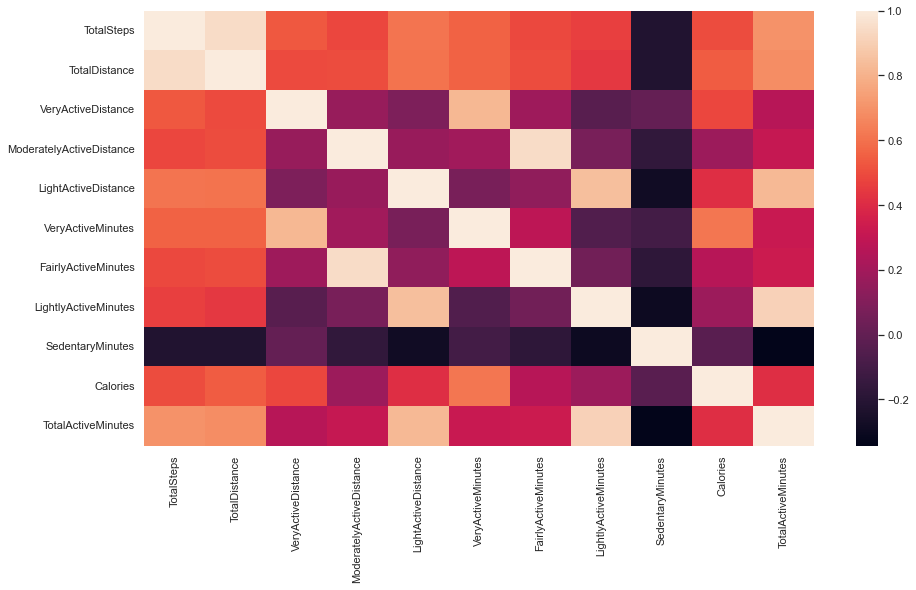

In [82]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df2.corr())

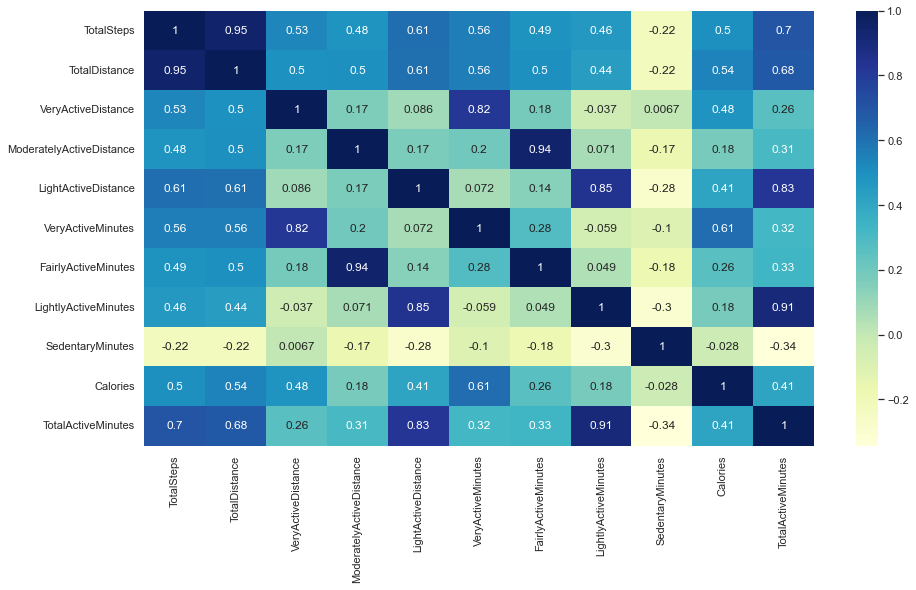

In [83]:
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

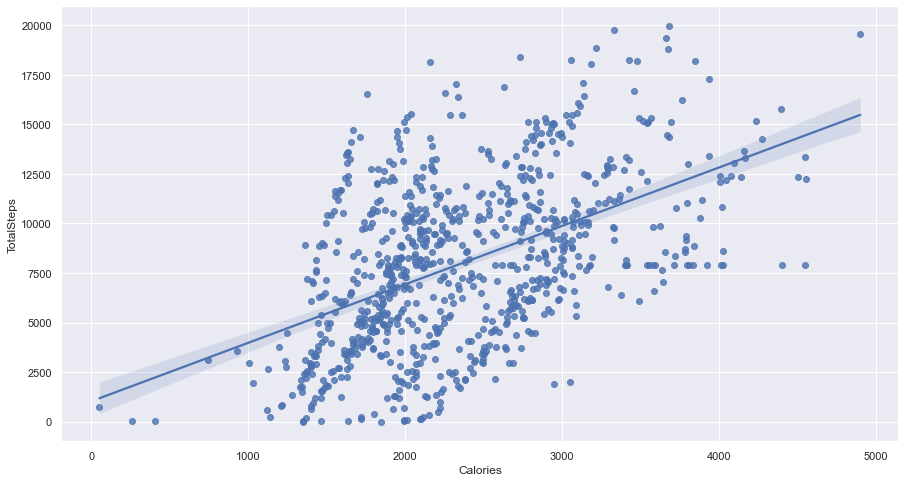

In [77]:
sns.regplot(y= 'TotalSteps', x = 'Calories', data = df2 )

<AxesSubplot:xlabel='month', ylabel='TotalDistance'>

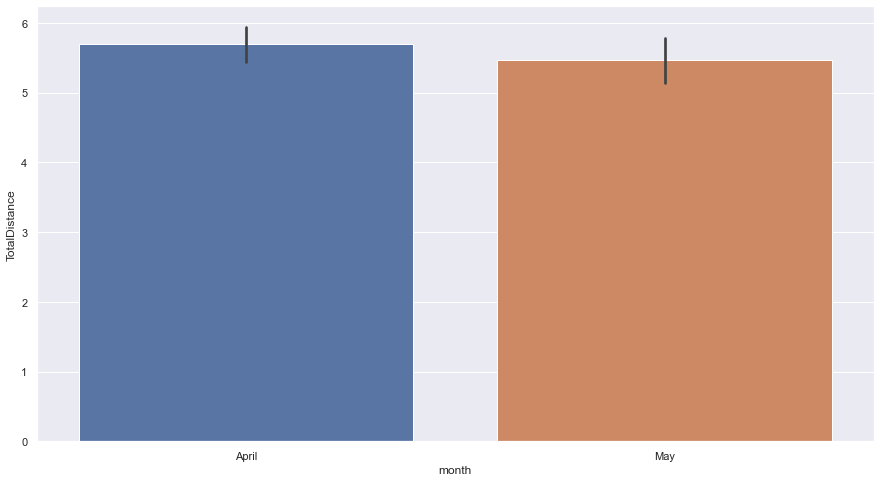

In [103]:
sns.barplot(y= 'TotalDistance', x = 'month', data = df2, ci = 95)

In [87]:
#checking the number of entries for April
query = 'SELECT COUNT (*) FROM df2 WHERE month = "April"'
pysqldf(query)

,COUNT (*)
0,565


In [88]:
#checking the number of entries for May
query = 'SELECT COUNT (*) FROM df2 WHERE month = "May"'
pysqldf(query)

,COUNT (*)
0,297


<AxesSubplot:xlabel='Calories', ylabel='SedentaryMinutes'>

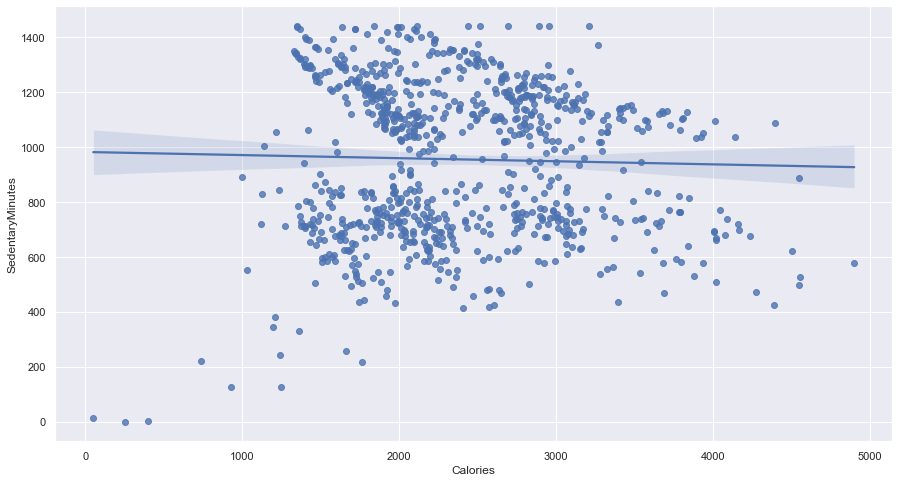

In [79]:
sns.regplot(y= 'SedentaryMinutes', x = 'Calories', data = df2 )

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='TotalActiveMinutes'>

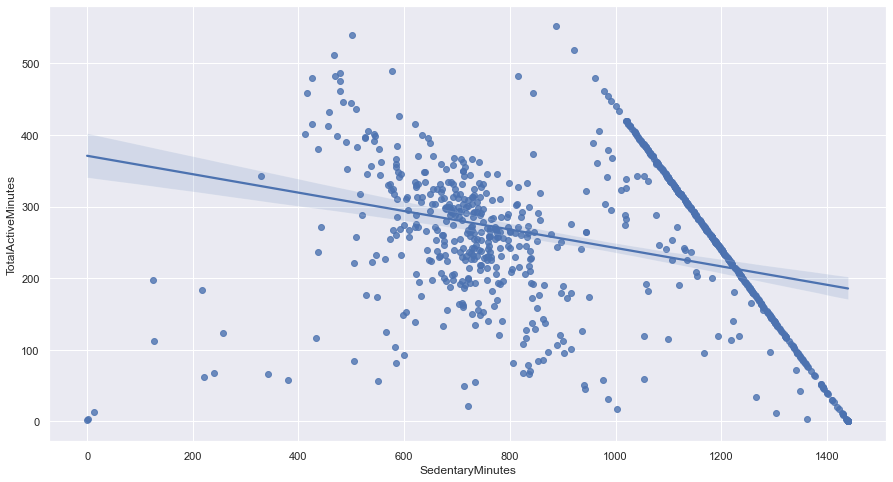

In [84]:
sns.regplot(y= 'TotalActiveMinutes', x = 'SedentaryMinutes', data = df2 )

In [97]:
#sum of total distance covered by month
df3 = df2.groupby(['month']) [['TotalDistance']].sum()
df3.head()

,TotalDistance
month,
April,3214.260002
May,1623.119996


In [99]:
df3.columns

Index(['TotalDistance'], dtype='object')

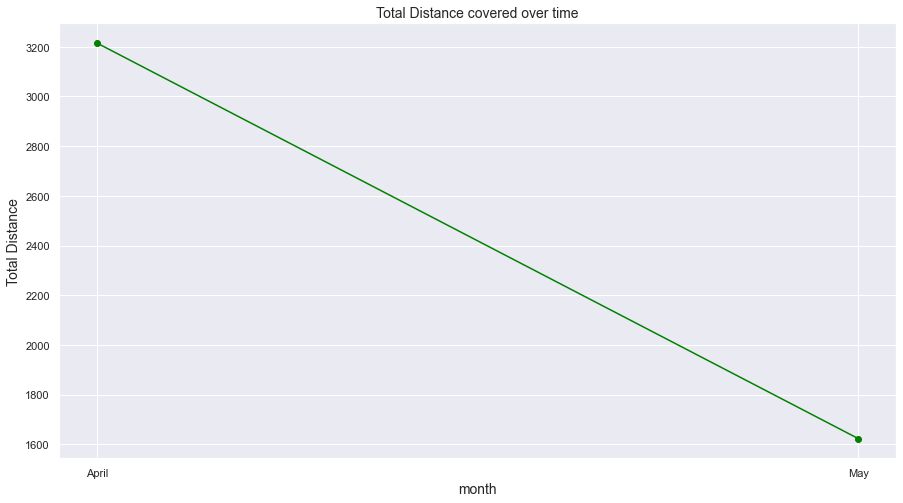

In [101]:
# linear graph showing total distance covered over the course of app users
plt.plot(df3.index, df3['TotalDistance'], color='green', marker='o')
plt.title('Total Distance covered over time', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('Total Distance', fontsize=14)
plt.grid(True)
plt.show()

## SOME INSIGHTS FROM THE ANALYSIS
From the correlation heatmap, calories burned was not strongly correlated with total steps or total distance. It was also poorly correlated with sedentary minutes. 

However, bella beat app users have significantly higher sedentary minutes compared to total active minutes. This suggests that bella beat users are mostly sedentary workers who need to increase their activity. 
Bella beat app can include features such as reminders to move every hour to increase the daily activity of their users. 

Further, the activity of bella beat users remained constant over the course of app use. Features that encourage activity such as competitions should be included to increase activity.
